In [55]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

Get the data of the url

In [56]:
urlData = requests.get("https://api.stackexchange.com/2.2/search?order=desc&sort=activity&intitle=perl&site=stackoverflow").content
data = json.loads(urlData)

Se cargan los datos en un data frame para optimizar la busqueda de elementos dependiendo a la categoría de interés. Además se visualizan los datos para tener una mejor comprensión de la estructura.

In [57]:
items = pd.DataFrame(data['items'])
items['creation_date'] = pd.to_datetime(items['creation_date'],unit='s')
items.head()

,tags,owner,is_answered,view_count,answer_count,score,last_activity_date,creation_date,last_edit_date,question_id,content_license,link,title,accepted_answer_id,closed_date,closed_reason
0,"[regex, regexp-replace, re2, re2j]","{'reputation': 1, 'user_id': 19772458, 'user_t...",False,21,1,0,1660623598,2022-08-16 03:50:22,1.660623e+09,73368606,CC BY-SA 4.0,https://stackoverflow.com/questions/73368606/e...,error parsing regexp invalid or unsupported Pe...,NaN,NaN,NaN
1,"[arrays, list, scalar, perl]","{'reputation': 3105, 'user_id': 926841, 'user_...",True,642,3,3,1660615579,2019-08-03 05:36:51,1.564816e+09,57335742,CC BY-SA 4.0,https://stackoverflow.com/questions/57335742/p...,Perl: Length of an anonymous list,57335765.0,NaN,NaN
2,"[regex, linux, perl]","{'reputation': 31, 'user_id': 18499418, 'user_...",True,48,1,1,1660602684,2022-08-15 18:18:36,1.660602e+09,73364936,CC BY-SA 4.0,https://stackoverflow.com/questions/73364936/i...,Is there a way to retain perl regex captures w...,NaN,NaN,NaN
3,"[macos, perl, libpng]","{'reputation': 9, 'user_id': 19767508, 'user_t...",False,43,1,0,1660601758,2022-08-15 11:40:25,1.660572e+09,73360506,CC BY-SA 4.0,https://stackoverflow.com/questions/73360506/p...,Perl Imager - libpng PNG libraries or headers ...,NaN,NaN,NaN
4,[perl],"{'reputation': 25, 'user_id': 18266889, 'user_...",True,77,1,2,1660575957,2022-08-15 10:57:09,1.660572e+09,73360040,CC BY-SA 4.0,https://stackoverflow.com/questions/73360040/e...,Explanation for Perl syntax needed,73362158.0,NaN,NaN


Se declaran dos listas para contener a los items que tengan el atributo 'is_answered' como true o false y se cataloga cada dato añadiendolo a la lista correspondiente

In [58]:
data_answered = []
data_notAnswered = []
for item in data['items']:
    if item['is_answered'] == True:
        data_answered.append(item)
    else: data_notAnswered.append(item)

Se muestra el número de respuestas contestadas

In [59]:
print("El número de respuestas contestadas es ", len(data_answered))

El número de respuestas contestadas es  23


Se muestra el número de respuestas no contestadas

In [60]:
print("El número de respuestas no contestadas es ", len(data_notAnswered))

El número de respuestas no contestadas es  7


Visualización de las proporciones de las respuestas dependiendo a si fueron contestadas o no

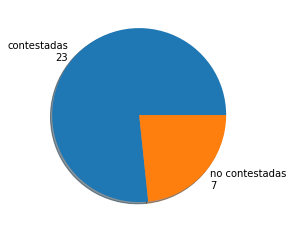

In [61]:
plt.pie([len(data_answered),len(data_notAnswered)], labels= ['contestadas\n'+str(len(data_answered)),'no contestadas\n'+str(len(data_notAnswered))], shadow = True)
plt.show()

Organizando de menor a mayor el número de vistas de la respuesta en el data frame, se obtiene el elemento con menor número de vistas

In [62]:
byViews = items.sort_values('view_count')
print("Elemento con menor número de vistas:\n",byViews.iloc[0])

Elemento con menor número de vistas:
 tags                                 [regex, regexp-replace, re2, re2j]
owner                 {'reputation': 1, 'user_id': 19772458, 'user_t...
is_answered                                                       False
view_count                                                           21
answer_count                                                          1
score                                                                 0
last_activity_date                                           1660623598
creation_date                                       2022-08-16 03:50:22
last_edit_date                                             1660622600.0
question_id                                                    73368606
content_license                                            CC BY-SA 4.0
link                  https://stackoverflow.com/questions/73368606/e...
title                 error parsing regexp invalid or unsupported Pe...
accepted_answer_id        

Organizando de menor a mayor el número de vistas de la respuesta en el data frame, se obtiene el elemento de la respuesta que es más antigua

In [63]:
byCreationDate = items.sort_values('creation_date')
print("Elemento de la respuesta que es más antigua:\n",byCreationDate.iloc[0])

Elemento de la respuesta que es más antigua:
 tags                                             [perl, cross-platform]
owner                 {'reputation': 25631, 'user_id': 6444, 'user_t...
is_answered                                                        True
view_count                                                        69339
answer_count                                                         11
score                                                                60
last_activity_date                                           1660317247
creation_date                                       2008-12-02 16:59:00
last_edit_date                                             1228353831.0
question_id                                                      334686
content_license                                            CC BY-SA 2.5
link                  https://stackoverflow.com/questions/334686/how...
title                    How can I detect the operating system in Perl?
accepted_answer_id

Y también se obtiene el elemento de la respuesta que más reciente

In [64]:
print("Elemento de la respuesta más reciente:\n",byCreationDate.iloc[-1])

Elemento de la respuesta más reciente:
 tags                                 [regex, regexp-replace, re2, re2j]
owner                 {'reputation': 1, 'user_id': 19772458, 'user_t...
is_answered                                                       False
view_count                                                           21
answer_count                                                          1
score                                                                 0
last_activity_date                                           1660623598
creation_date                                       2022-08-16 03:50:22
last_edit_date                                             1660622600.0
question_id                                                    73368606
content_license                                            CC BY-SA 4.0
link                  https://stackoverflow.com/questions/73368606/e...
title                 error parsing regexp invalid or unsupported Pe...
accepted_answer_id      

Finalmente, se obtiene la respuesta del usuario que tiene la mayor reputación.

In [65]:
rep = 0
for owner in items['owner']:
    if owner['reputation'] > rep: 
        rep = owner['reputation']
        bestOwner = owner
resBestOwner = 0
print("Respuesta del usuario con mayor reputación:\n",items.loc[items['owner'] == bestOwner].T)


Respuesta del usuario con mayor reputación:
                                                                    17
tags                                           [perl, cross-platform]
owner               {'reputation': 25631, 'user_id': 6444, 'user_t...
is_answered                                                      True
view_count                                                      69339
answer_count                                                       11
score                                                              60
last_activity_date                                         1660317247
creation_date                                     2008-12-02 16:59:00
last_edit_date                                           1228353831.0
question_id                                                    334686
content_license                                          CC BY-SA 2.5
link                https://stackoverflow.com/questions/334686/how...
title                  How can I detect the o